In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt 

iris = datasets.load_iris()
digits = datasets.load_digits()

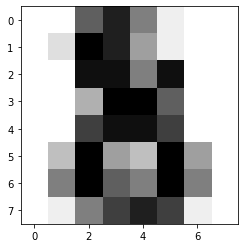

In [3]:
digits = datasets.load_digits()
digits.images.shape

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 
plt.show()

In [4]:

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)
#print(iris_X)
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


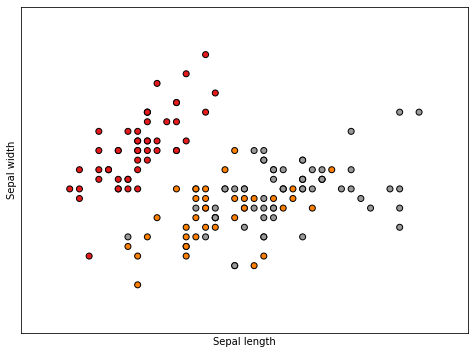

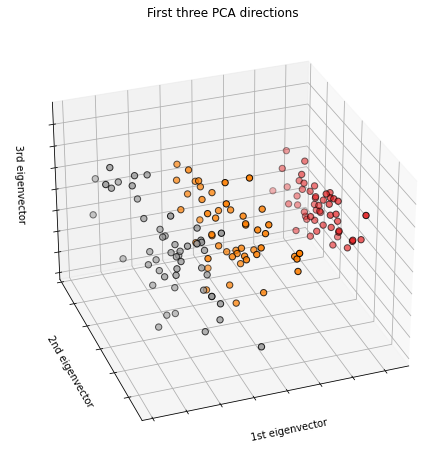

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
           
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

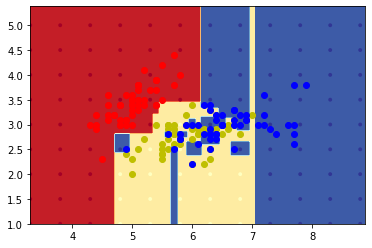

In [8]:

from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

clf = DecisionTreeClassifier().fit(X, y)

cmap = plt.cm.RdYlBu
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)

xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
Z_points_coarser = clf.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

for i, c in zip(range(3), "ryb"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=cmap)
plt.show()

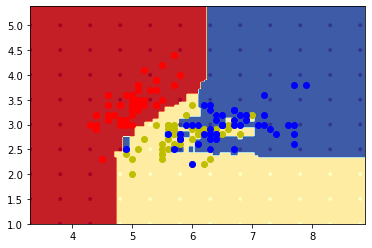

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100).fit(X, y)

cmap = plt.cm.RdYlBu
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)

xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
Z_points_coarser = clf.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

for i, c in zip(range(3), "ryb"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=cmap)
plt.show()

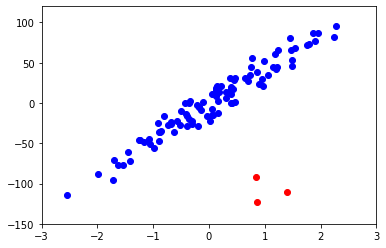

In [10]:
from sklearn.datasets import make_regression

n_outliers = 3
X, y, coef = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10,
                             coef=True, random_state=0)

np.random.seed(1)
X[-n_outliers:] = 1 + 0.25 * np.random.normal(size=(n_outliers, 1))
y[-n_outliers:] = -100 + 10 * np.random.normal(size=n_outliers)

plt.scatter(X[:-n_outliers], y[:-n_outliers], color="b")
plt.scatter(X[-n_outliers:], y[-n_outliers:], color="r")
plt.xlim(-3, 3)
plt.ylim(-150, 120)
plt.show()

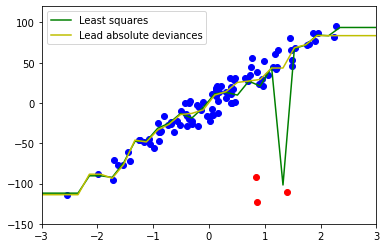

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

clf_ls = GradientBoostingRegressor(loss="ls")
clf_lad = GradientBoostingRegressor(loss="lad")
clf_ls.fit(X, y)
clf_lad.fit(X, y)

X_test = np.linspace(-5, 5).reshape(-1, 1)
plt.scatter(X[:-n_outliers], y[:-n_outliers], color="b")
plt.scatter(X[-n_outliers:], y[-n_outliers:], color="r")
plt.plot(X_test, clf_ls.predict(X_test), "g", label="Least squares")
plt.plot(X_test, clf_lad.predict(X_test), "y", label="Lead absolute deviances")
plt.xlim(-3, 3)
plt.ylim(-150, 120)
plt.legend()
plt.show()